<a href="https://colab.research.google.com/github/kugmax/tensorflow_learn/blob/master/One_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn import datasets

In [2]:
iris = datasets.load_iris()
len(iris.data)

150

In [0]:
x_vals = np.array([x[0:3] for x in iris.data ])
y_vals = np.array([x[3] for x in iris.data ])
sess = tf.Session()

In [0]:
seed = 7
tf.set_random_seed(seed)
np.random.seed(seed)

In [0]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices) ))

In [6]:
x_train = x_vals[train_indices]
y_train = y_vals[train_indices]

x_test = x_vals[test_indices]
y_test = y_vals[test_indices]

(x_train.shape, y_train.shape,  x_test.shape, y_test.shape)

((120, 3), (120,), (30, 3), (30,))

In [0]:
def normalize_cols(m):
  col_max = m.max(axis=0)
  col_min = m.min(axis=0)
  return (m - col_min) / (col_max - col_min)

In [0]:
batch_size = 50
x = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [0]:
hidden_layers_nodes = 5

a1 = tf.Variable(tf.random_normal(shape=[3, hidden_layers_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layers_nodes]))
hidden_output = tf.nn.relu(tf.add(tf.matmul(x, a1), b1))

a2 = tf.Variable(tf.random_normal(shape=[hidden_layers_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, a2), b2))

In [0]:
loss = tf.reduce_mean(tf.square(y - final_output))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.005)
train_step = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()
sess.run(init)

In [13]:
train_loss = []
test_loss = []

for i in range(10):
  rand_index = np.random.choice(len(x_train), size=batch_size)    
  
  rand_x = x_train[rand_index]
  rand_y = np.transpose([y_train[rand_index]])
  
  sess.run(train_step, feed_dict={x: rand_x, y: rand_y})
  
  train_temp_loss = sess.run(loss, feed_dict={x: rand_x, y: rand_y})
  train_loss.append(np.sqrt(train_temp_loss))
  
  test_temp_loss = sess.run(loss, feed_dict={x: x_test, y: np.transpose([y_test])})
  test_loss.append(np.sqrt(test_temp_loss))
  
#    if (i + 1) % 50 == 0:
  print(str(i + 1) + " train loss: " + str(train_temp_loss) + " test loss: " + str(test_temp_loss))

1 train loss: 1.5879998 test loss: 1.917
2 train loss: 2.3502 test loss: 1.917
3 train loss: 1.9277999 test loss: 1.917
4 train loss: 1.8301998 test loss: 1.917
5 train loss: 2.1354 test loss: 1.917
6 train loss: 1.9031999 test loss: 1.917
7 train loss: 1.7885998 test loss: 1.917
8 train loss: 1.9576 test loss: 1.917
9 train loss: 2.1109998 test loss: 1.917
10 train loss: 1.6243999 test loss: 1.917


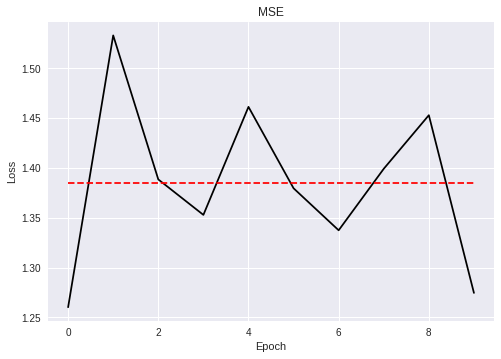

In [14]:
plt.plot(train_loss, 'k-', label='Train loss')
plt.plot(test_loss, 'r--', label='Test loss')
plt.title('MSE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()